# How to create a K-Nearest-Neighbour algorithm from scratch

## Objective: 

    1. Learn how to create a KNN algorithm from scratch the value of an unlabelled data point through KNN algorithm

In [1]:
#Step 1: Let's begin by imporing the necessary packages

#Linear algebra
import numpy as np
np.random.seed(0)

#Data processing
import pandas as pd

#Prediction and validation
from scipy.spatial.distance import euclidean as euc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error
from sklearn.preprocessing import StandardScaler


#Data visualisation
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
#Step 2: Setting up a class for our K-Nearest-Neighbour algorithm and the relevant formulas

class KNN():
    
    def fit(self, X_train, y_train):
        """Function that stores the trainning data (X_train) and it's corresponding labels (y_train).
        """
        self.X_train = X_train
        self.y_train = y_train
    
#    KNN.fit = fit #attaching the function we just created as a method to our KNN class.
    
    def _get_distances(self, x):
        """Function that calculates each distance between an unlabelled data point and each point in the trainning
        data and subsequently appends such distance, along with an index into a distances list.
        """
        distances = []
        for ind, val in enumerate(self.X_train): #the loop is ennumerated pair the distances with an index for storage.
            dist_to_i = euc(x, val) #calculating the eucledian distance.
            distances.append((ind, dist_to_i))
        return distances
    
#    KNN._get_distances = _get_distances
    
    def _get_k_nearest(self, dists, k):
        """Function that sorts the collection of distances from smallest to largest (in ascending order) and
        picks the first K entries from the sorted collection.
        """
        sorted_dists = sorted(dists, key=lambda x: x[1]) #sorting on the distances column.
        return sorted_dists[:k]

#    KNN._get_k_nearest = _get_k_nearest
    
    def _get_label_prediction(self, k_nearest):
        """Function that will get the labels that correspond to each of the k-nearest point, and return the 
        most common label amongst the neighbours.
        """
        labels = [self.y_train[i] for i, _ in k_nearest] #creating a list of labels from the labelled data (y_train)
        #for each index in k-nearest.
        counts = np.bincount(labels) #total counts for each label
        return np.argmax(counts)

#    KNN._get_label_prediction = _get_label_prediction
    
    def predict(self, X_test, k=3):
        """Function that when inputed an array of unlabelled data (X_test), calculates a prediction for 
        each point and returns an array of predictions. 
        """
        preds = []
        for i in X_test:
            dists = self._get_distances(i) #calculating the distance between each unlabelled and labelled point.
            k_nearest = self._get_k_nearest(dists, k) #identifying nearest points to the unlabelled data point.
            predicted_label = self._get_label_prediction(k_nearest) #determinning the most common label amongst KNN.
            preds.append(predicted_label)
        return preds
        
#    KNN.predict = predict

In [3]:
#Step 3: Initiating the KNN class and adding it the corresponding attributes and assigning it the relevant functions.

knn = KNN()
knn.fit
knn._get_distances
knn._get_label_prediction
knn.predict

<bound method KNN.predict of <__main__.KNN object at 0x61db59630>>

In [4]:
#Step 4: Importing and cleaning the data
import pandas as pd

raw_df = pd.read_csv('titanic.csv')
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df = raw_df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=False)
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df['Age'] = df['Age'].fillna(value=df['Age'].median())
df = df.dropna()
one_hot_df = pd.get_dummies(df)
labels = one_hot_df['Survived']
one_hot_df.drop('Survived', axis=1, inplace=True)
one_hot_df = np.array(one_hot_df)
labels = np.array(labels)

In [6]:
#Step 5: Importing the necessary packages and splitting our date into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

X_train, X_test, y_train, y_test = train_test_split(one_hot_df, labels, test_size=0.25)

In [7]:
#Step 6: Scalling the data to avoid leakage
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data_train = scaler.fit_transform(X_train)
scaled_data_test = scaler.transform(X_test)

In [8]:
#Step 7: Testing our KNN classifier

knn.fit(scaled_data_train, y_train)
preds = knn.predict(scaled_data_test, k=3)
print("Testing Accuracy: {}".format(accuracy_score(y_test, preds)))

Testing Accuracy: 0.7354260089686099


In [9]:
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    
    best_k = 0
    best_score = 0.0
    values_of_k = list(range(min_k, max_k+1, 2))
    test_errors = np.zeros(len(values_of_k))
    
    for i, k in enumerate(range(min_k, max_k+1, 2)):
        knn = KNN()
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test, k)
        test_errors[i] = np.sqrt(mean_squared_error(y_test, preds))
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
        else:
            pass
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))
    
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.plot(values_of_k, test_errors)
    ax.axvline(values_of_k[np.argmin(test_errors)], linestyle='--', color='black'); 

Best Value for k: 17
F1-Score: 0.7116564417177913


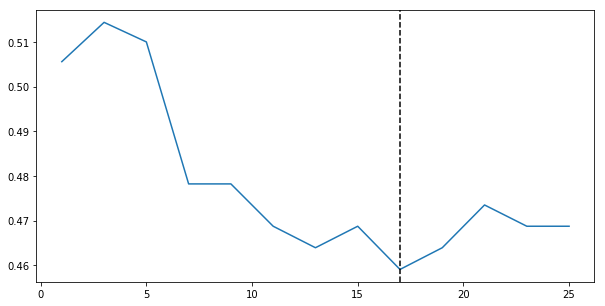

In [10]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

In [11]:
#Step 7: Re-testing our KNN classifier

knn.fit(scaled_data_train, y_train)
preds = knn.predict(scaled_data_test, k=17)
print("Testing Accuracy: {}".format(accuracy_score(y_test, preds)))

Testing Accuracy: 0.7892376681614349


In [24]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_test, preds))
print("Recall:",recall_score(y_test, preds))

Precision: 0.8055555555555556
Recall: 0.6373626373626373


In [14]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, preds)
print('Confusion Matrix:\n',cm)

Confusion Matrix:
 [[118  14]
 [ 33  58]]


In [21]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

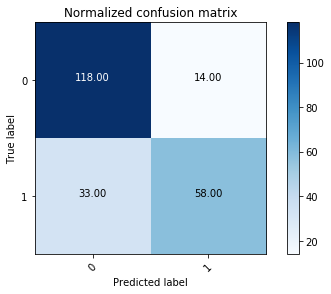

In [22]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cm, classes=set(labels), title='Normalized confusion matrix')

plt.show()